In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Tenure', 'NumOfProducts', 'IsActiveMember'], axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,101348.88,1
1,608,Spain,Female,41,83807.86,0,112542.58,0
2,502,France,Female,42,159660.80,1,113931.57,1
3,699,France,Female,39,0.00,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,79084.10,0


In [6]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [9]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df.describe()

,CreditScore,Age,Balance,HasCrCard,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,0.70550,100090.239881,0.203700
std,96.653299,10.487806,62397.405202,0.45584,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.00000,11.580000,0.000000
25%,584.000000,32.000000,0.000000,0.00000,51002.110000,0.000000
50%,652.000000,37.000000,97198.540000,1.00000,100193.915000,0.000000
75%,718.000000,44.000000,127644.240000,1.00000,149388.247500,0.000000
max,850.000000,92.000000,250898.090000,1.00000,199992.480000,1.000000


In [11]:
# Resample the dataset to avoid imbalance errors

yes = df[df['Exited']==0].sample(7963)
no = df[df['Exited']==1].sample(7963, replace=True)

df = pd.concat([yes, no], axis=0)
df['Exited'].value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [12]:
df.shape

(15926, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 4572 to 2336
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Geography        15926 non-null  object 
 2   Gender           15926 non-null  object 
 3   Age              15926 non-null  int64  
 4   Balance          15926 non-null  float64
 5   HasCrCard        15926 non-null  int64  
 6   EstimatedSalary  15926 non-null  float64
 7   Exited           15926 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ MB


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.to_csv("churn_data_4viz.csv", index=False)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

import xgboost
import lightgbm

In [17]:
'''
  France = 1
  Germany = 2
  Spain = 3
'''

df['Geography'] = np.where(df["Geography"]=='France', 1, np.where(df["Geography"]=="Germany", 2, 3))

In [18]:
'''
  Male = 1
  Female = 0
'''

df['Gender'] = np.where(df["Gender"]=="Male", 1, 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 4572 to 2336
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Geography        15926 non-null  int64  
 2   Gender           15926 non-null  int64  
 3   Age              15926 non-null  int64  
 4   Balance          15926 non-null  float64
 5   HasCrCard        15926 non-null  int64  
 6   EstimatedSalary  15926 non-null  float64
 7   Exited           15926 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,HasCrCard,EstimatedSalary,Exited
4572,669,2,0,30,139872.81,1,188795.85,0
5155,713,1,0,42,0.00,0,82565.01,0
1133,559,1,1,34,0.00,1,66721.98,0
9197,557,1,1,34,83074.00,1,132673.22,0
4507,592,1,1,28,116498.22,1,144290.25,0


In [21]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19, test_size=0.3)

In [23]:
model_list = [LogisticRegression(), SVC(), MultinomialNB(), xgboost.XGBClassifier(), lightgbm.LGBMClassifier()]

for model in model_list:
  model.fit(X_train, y_train)
  print("{}: \t {}".format(model, accuracy_score(y_test, model.predict(X_test))))

LogisticRegression(): 	 0.6483884470489745
SVC(): 	 0.5648807032231059
MultinomialNB(): 	 0.5426956885726245
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 	 0.8495186270406028
[LightGBM] [Info] Number of positive: 5627, number of negative: 5521
[LightGBM] [Warning] Auto-choosing col-wis

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
mod = BaggingClassifier(xgboost.XGBClassifier())

In [26]:
mod.fit(X_train, y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))

In [27]:
accuracy_score(y_test, mod.predict(X_test))

0.8478442863122645

In [28]:
from sklearn.ensemble import StackingClassifier

In [29]:
estimators = [('lgbm', lightgbm.LGBMClassifier())]

sclf = StackingClassifier(estimators=estimators, final_estimator=xgboost.XGBClassifier(), cv=10)

sclf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5627, number of negative: 5521
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 11148, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504754 -> initscore=0.019017
[LightGBM] [Info] Start training from score 0.019017
[LightGBM] [Info] Number of positive: 5065, number of negative: 4968
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 10033, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504834 -> initscore=0.019337
[LightG

StackingClassifier(cv=10, estimators=[('lgbm', LGBMClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [30]:
accuracy_score(y_test, sclf.predict(X_test))

0.7997069903725408

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_test = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

grid = GridSearchCV(estimator = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=np.nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None),
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

({'reg_alpha': 0.005}, 0.9002878695670162)

In [33]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
model = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=np.nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [42]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.8413562159899539

In [36]:
import pickle

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2442
           1       0.81      0.88      0.84      2336

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



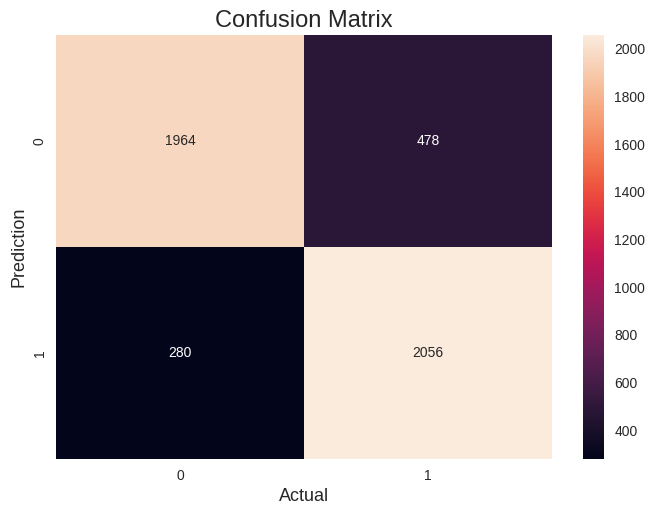

In [53]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

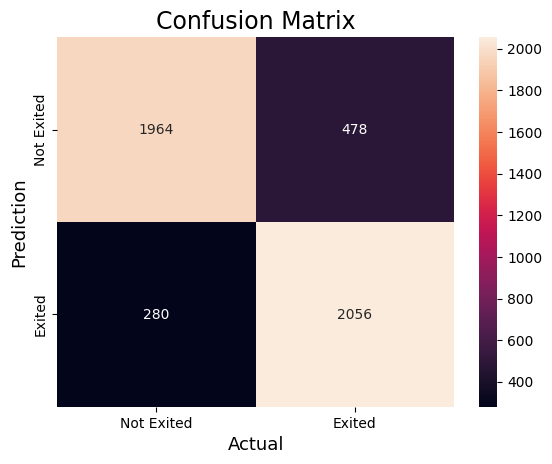

In [45]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Exited','Exited'],
            yticklabels=['Not Exited','Exited'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

<ipython-input-49-6cf69af155d2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


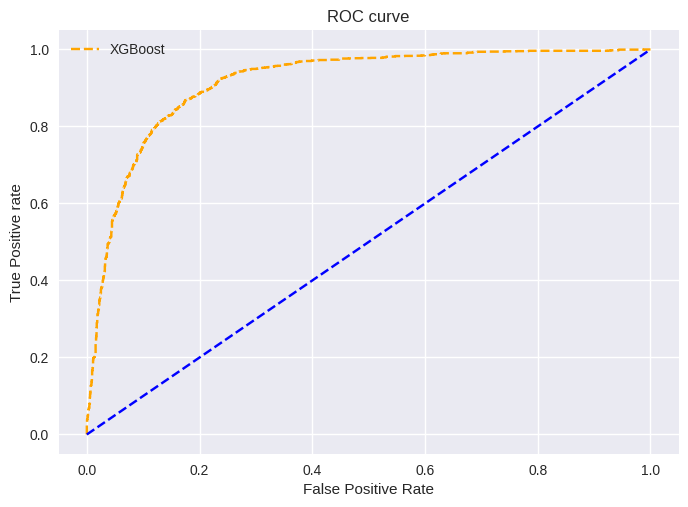

In [49]:
fpr, tpr, thresh = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [52]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9157212746681924

In [37]:
prid = grid.predict(X_test)

In [38]:
accuracy_score(y_test, prid)

0.8413562159899539

In [39]:
model = xgboost.XGBClassifier(reg_alpha = 0.005)

In [40]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.8413562159899539

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,HasCrCard,EstimatedSalary,Exited
4572,669,2,0,30,139872.81,1,188795.85,0
5155,713,1,0,42,0.00,0,82565.01,0
1133,559,1,1,34,0.00,1,66721.98,0
9197,557,1,1,34,83074.00,1,132673.22,0
4507,592,1,1,28,116498.22,1,144290.25,0


In [ ]:
model.predict([[581, 1, 0, 27, 102258.11, 1, 194681.60]])

array([0])